 # Spike Challenge - Ivania Maturana

In [72]:
import pandas as pd

In [73]:
import seaborn as sb

In [74]:
import numpy as np

In [153]:
import matplotlib.pyplot as plt

# 2

In [75]:
datos_caudal=pd.read_csv('caudal_extra.csv',index_col=0) ## index_col to erase the first column 

In [26]:
datos_caudal.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN


In [7]:
datos_caudal.tail()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
1411175,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2017-10-10 00:00:00+00:00,46.885,7322001,Rio Maule En Longitudinal,0.00,12.975000
1411176,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2017-10-14 00:00:00+00:00,195.978,7322001,Rio Maule En Longitudinal,0.00,22.665714
1411177,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-01-04 00:00:00+00:00,124.327,7322001,Rio Maule En Longitudinal,1.91,20.757143
1411178,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-01-29 00:00:00+00:00,23.682,7322001,Rio Maule En Longitudinal,0.00,27.598333
1411179,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-02-11 00:00:00+00:00,18.437,7322001,Rio Maule En Longitudinal,0.00,28.497999


In [9]:
datos_caudal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411180 entries, 0 to 1411179
Data columns (total 16 columns):
codigo_estacion           1411180 non-null int64
institucion               1411180 non-null object
fuente                    1411180 non-null object
nombre                    1411180 non-null object
altura                    1411180 non-null int64
latitud                   1411180 non-null float64
longitud                  1411180 non-null float64
codigo_cuenca             1411180 non-null int64
nombre_sub_cuenca         1411180 non-null object
cantidad_observaciones    1411180 non-null int64
fecha                     1411180 non-null object
caudal                    1411180 non-null float64
gauge_id                  1411180 non-null int64
gauge_name                1411180 non-null object
precip_promedio           1383413 non-null float64
temp_max_promedio         1259617 non-null float64
dtypes: float64(5), int64(5), object(6)
memory usage: 183.0+ MB


151563 entradas de 1411180 son nulos para el caso de la columna temperatura promedio y 27767 para la columna precipitacion promedio. En el caso de las precipitaciones tienen sentido tener valores cero debido a que no hay lluvia todo el tiempo. Para el caso de la temperatura max promedio probablemente es un error de la medicion por lo que aparece un NaN en lugar de un numero. La mayoría de estos son el año 1960 por lo que es muy probable que el error de medición este asociado a la época y a los instrumentos con los que las mediciones fueron hechas.

In [9]:
datos_caudal.describe()

,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06
mean,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01
std,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00
min,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01
25%,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01
50%,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01
75%,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01
max,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01


# 3 Plots

Histograma para la altura. La mayoría de los datos estan situados cerca del nivel del mar siendo pocos los tomados en altura.

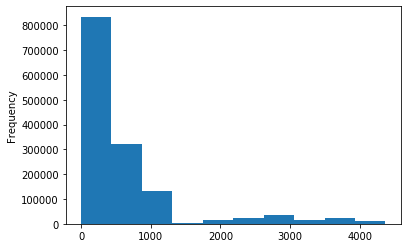

In [77]:
datos_caudal['altura'].plot(kind='hist') # altura datos mayoritariamente cerca del nivel del mar. Bajo 1000 m

Histograma para el caudal

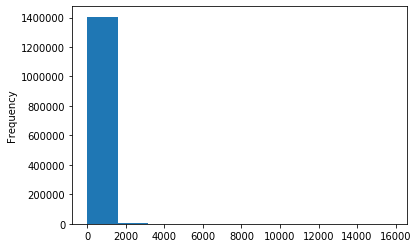

In [81]:
datos_caudal['caudal'].plot(kind='hist') 

Histograma para la precipitación promedio. La precipitación promedio por dia asumiendo esta en [mm], no supera los 100 [mm]. Las mas frecuentes están por debajo de 50 [mm]

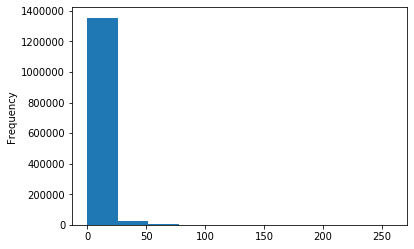

In [79]:
datos_caudal['precip_promedio'].plot(kind='hist') 

In [80]:
datos_caudal.describe() 

,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06
mean,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01
std,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00
min,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01
25%,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01
50%,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01
75%,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01
max,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01


In [82]:
datos_caudal.fecha.astype() #how i can see the type of data?

TypeError: astype() missing 1 required positional argument: 'dtype'

In [83]:
## Guardo columna nueva en caso de que la fecha no este en la data correcta
datos_caudal['fecha2'] = pd.to_datetime(datos_caudal.fecha)

In [84]:
datos_caudal.head() #new column with the data fecha2 in the correct format for dates

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,fecha2
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-01-06 00:00:00+00:00
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-03-27 00:00:00+00:00
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-05-07 00:00:00+00:00
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-06-30 00:00:00+00:00
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-07-22 00:00:00+00:00


Analizamos datos solamente para Rio Grande En Paloma 1 (localizado en la región de Coquimbo)  

In [89]:
rio_1 = datos_caudal[datos_caudal.nombre == 'Rio Grande En Paloma 1']

La primera figura muestra el caudal versus la fecha. La candidad de caudales aumento desde 1960 a 1984 probablemente el aumento de temperatura este asociado a este incremento. En la segunda figura muestra la fecha y la precipitación promedio. Podemos ver que con respecto a 1960, en el año 1984 las precipitaciones han aumentado teniendo un peak en 1980. Sabemos que el aumento de precipitaciones esta asociado al calentamiento global y es importante hacer un estudio profundo con las diferentes variables de nuestro data set para determinar si el aumento de precipitaciones esta altamente relacionado en nuestro pais con el calentamiento global.

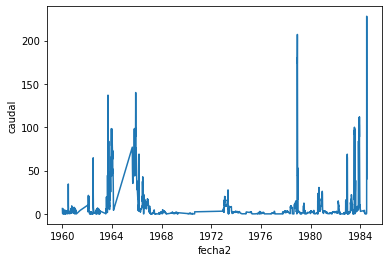

In [87]:
sb.lineplot(x='fecha2', y='caudal', data=rio_1) #the figure shown the caudal vs the date for the river Rio Grande en Paloma 1

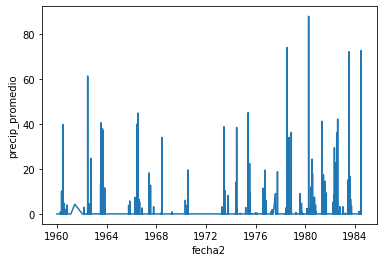

In [32]:
sb.lineplot(x='fecha2', y='precip_promedio', data=rio_1) #the figure shown the precip_prom vs the date

In [90]:
after_2000 = datos_caudal[datos_caudal.fecha2 > '2000']

In [91]:
after_2000.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,fecha2
157,10414001,DGA,dga_web,Rio Maullin En Las Quemas,0,-41.400002,-73.216698,104,Rio Maullin,6554,2000-01-14 00:00:00+00:00,52.3,10414001,Rio Maullin En Las Quemas,0.000000,19.450001,2000-01-14 00:00:00+00:00
158,10414001,DGA,dga_web,Rio Maullin En Las Quemas,0,-41.400002,-73.216698,104,Rio Maullin,6554,2000-01-18 00:00:00+00:00,49.4,10414001,Rio Maullin En Las Quemas,0.000000,20.549999,2000-01-18 00:00:00+00:00
159,10414001,DGA,dga_web,Rio Maullin En Las Quemas,0,-41.400002,-73.216698,104,Rio Maullin,6554,2000-03-04 00:00:00+00:00,46.1,10414001,Rio Maullin En Las Quemas,0.000000,18.750000,2000-03-04 00:00:00+00:00
160,10414001,DGA,dga_web,Rio Maullin En Las Quemas,0,-41.400002,-73.216698,104,Rio Maullin,6554,2000-03-16 00:00:00+00:00,63.1,10414001,Rio Maullin En Las Quemas,0.000000,16.000000,2000-03-16 00:00:00+00:00
161,10414001,DGA,dga_web,Rio Maullin En Las Quemas,0,-41.400002,-73.216698,104,Rio Maullin,6554,2000-04-20 00:00:00+00:00,40.1,10414001,Rio Maullin En Las Quemas,0.633333,16.950001,2000-04-20 00:00:00+00:00


La figura muestra la latitud vs precipitación promedio. Concuerda con le hecho de que hay mas lluvias cerca del sur de chile. Es consistente con lo que debiera ocurrir.

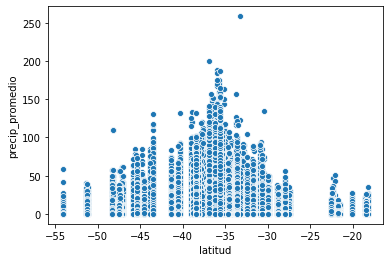

In [93]:
sb.scatterplot(x='latitud', y='precip_promedio', data=after_2000)

In [272]:
datos_caudal['year'] = datos_caudal.fecha2.dt.year #agregamos una columna del año llamada year. Esa columna la usamos luego.

In [273]:
datos_caudal.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,...,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,fecha2,caudal_extremo,temp_extremo,precip_extremo,year
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-01-06 00:00:00+00:00,False,False,False,1960
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-03-27 00:00:00+00:00,False,False,False,1960
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-05-07 00:00:00+00:00,False,False,False,1960
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-06-30 00:00:00+00:00,False,False,False,1960
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-07-22 00:00:00+00:00,False,False,False,1960


In [323]:
#Ahora vamos a ver las funciones

## Define variables. One column at time. Aqui la fecha corresponde al año 

def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    (datos_caudal.codigo_estacion == codigo_estacion), 
    datos_caudal.fecha2 > fecha_min
    datos_caudal.fecha2 < fecha_max
    plt.scatter(x='fecha2', y=columna, data=rio_1)

## GPlot many columns in only one figure
#def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
 #   sb.lineplot(x='fecha2', y='caudal', data=rio_1)
     #datos_caudal.fecha2 > fecha_min
    #datos_caudal.fecha2 < fecha_max
    #plt.scatter(x='fecha2', y='caudal', data=rio_1)
    #plt.scatter(x='fecha2', y='precip_promedio', data=rio_1)

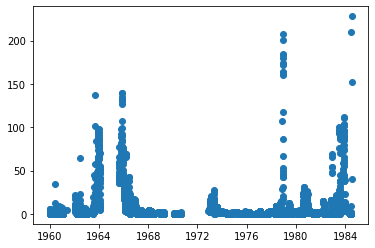

In [325]:
time_plot_una_estacion('10414001', 'caudal', '1960', '2000')

In [394]:
## GPlot many columns in only one figure
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
    (datos_caudal.codigo_estacion == codigo_estacion),
    columnas = np.array(['caudal','precip_promedio','temp_max_promedio'])
    (datos_caudal.columnas[i] == columnas2),
    datos_caudal.fecha2 > fecha_min
    datos_caudal.fecha2 < fecha_max
    plt.scatter(x='fecha2', y=columnas, data=rio_1)
    #plt.scatter(x='fecha2', y='precip_promedio', data=rio_1)

In [407]:
datos_caudal.caudal

0            0.812
1            0.236
2            0.730
3            3.590
4            1.370
            ...   
1411175     46.885
1411176    195.978
1411177    124.327
1411178     23.682
1411179     18.437
Name: caudal, Length: 1411180, dtype: float64

In [379]:
#time_plot_estaciones_varias_columnas('10414001', columnas, '1960', '2000')

# 4

In [94]:
#percentil 95
def P95(X):
    return np.percentile(X, 95)

In [95]:
datos_caudal.columns

Index(['codigo_estacion', 'institucion', 'fuente', 'nombre', 'altura',
       'latitud', 'longitud', 'codigo_cuenca', 'nombre_sub_cuenca',
       'cantidad_observaciones', 'fecha', 'caudal', 'gauge_id', 'gauge_name',
       'precip_promedio', 'temp_max_promedio', 'fecha2'],
      dtype='object')

In [96]:
datos_caudal.groupby('nombre').caudal.agg(P95)

nombre
Estero Camisas En Desembocadura               2.2070
Estero Catemu Antes Junta Rio Aconcagua       5.0500
Estero Chimbarongo En Puente El Huape        74.9594
Estero Curipeumo En Lo Hernandez             12.4000
Estero Los Puercos En Puente Los Puercos     13.0000
                                              ...   
Rio Turbio En Varillar                       15.8000
Rio Uble En San Fabian N 2                  229.2880
Rio Vergara En Tijeral                      189.0000
Rio ÑUble En San Fabian                     290.0000
Zanjon De La Aguada Puente Particular        11.2000
Name: caudal, Length: 133, dtype: float64

In [97]:
#agrega una coumlna para datos donde el caudal es mayor al percentil 95

datos_caudal['caudal_extremo'] = datos_caudal.caudal > datos_caudal.groupby(datos_caudal['nombre']).caudal.transform(P95)

In [98]:
#agrega una columna para datos donde la temp extre es mayor al percentil 95

datos_caudal['temp_extremo'] = datos_caudal.temp_max_promedio > datos_caudal.groupby(datos_caudal['nombre']).temp_max_promedio.transform(P95)

In [99]:
#agrega una columna para datos donde la precip extre es mayor al percentil 95

datos_caudal['precip_extremo'] = datos_caudal.precip_promedio > datos_caudal.groupby(datos_caudal['nombre']).precip_promedio.transform(P95)

In [138]:
datos_caudal.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,fecha2,caudal_extremo,temp_extremo,precip_extremo
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-01-06 00:00:00+00:00,False,False,False
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-03-27 00:00:00+00:00,False,False,False
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-05-07 00:00:00+00:00,False,False,False
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-06-30 00:00:00+00:00,False,False,False
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-07-22 00:00:00+00:00,False,False,False


La idea de percentil 95 me parece bastante adecuada. Nosotros en Física ultilizamos esta medida en los expeirmentos para encontrar nueva fisica y realizar plots de exclusión. Quizas una forma menos extrema es bajar la cantidad del percentil a percentil 90. 

In [235]:
datos_caudal[['codigo_estacion','fecha2','caudal_extremo']]

,codigo_estacion,fecha2,caudal_extremo
0,4540001,1960-01-06 00:00:00+00:00,False
1,4540001,1960-03-27 00:00:00+00:00,False
2,4540001,1960-05-07 00:00:00+00:00,False
3,4540001,1960-06-30 00:00:00+00:00,False
4,4540001,1960-07-22 00:00:00+00:00,False
...,...,...,...
1411175,7322001,2017-10-10 00:00:00+00:00,False
1411176,7322001,2017-10-14 00:00:00+00:00,False
1411177,7322001,2018-01-04 00:00:00+00:00,False
1411178,7322001,2018-01-29 00:00:00+00:00,False


In [263]:
estacion_fecha = datos_caudal[ (datos_caudal.codigo_estacion == 4540001) &(datos_caudal.fecha2.dt.year == 1960)]

In [258]:
datos_caudal.fecha2.dt.year

0          1960
1          1960
2          1960
3          1960
4          1960
           ... 
1411175    2017
1411176    2017
1411177    2018
1411178    2018
1411179    2018
Name: fecha2, Length: 1411180, dtype: int64

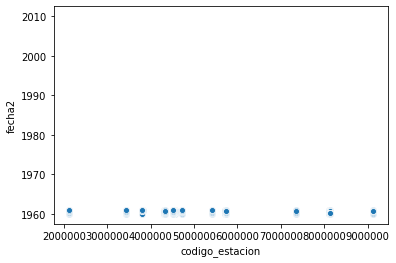

In [262]:
sb.scatterplot(x='codigo_estacion', y='fecha2', data=estacion_fecha)

# 5

In [115]:
False_caudal = datos_caudal[datos_caudal.caudal_extremo == False]

In [116]:
True_caudal = datos_caudal[datos_caudal.caudal_extremo == True]

In [117]:
True_caudal

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,fecha2,caudal_extremo,temp_extremo,precip_extremo
28,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1963-12-13 00:00:00+00:00,98.1,4540001,Rio Grande En Paloma 1,0.0,NaN,1963-12-13 00:00:00+00:00,True,False,False
29,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1963-12-24 00:00:00+00:00,94.9,4540001,Rio Grande En Paloma 1,0.0,NaN,1963-12-24 00:00:00+00:00,True,False,False
30,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1963-12-25 00:00:00+00:00,98.1,4540001,Rio Grande En Paloma 1,0.0,NaN,1963-12-25 00:00:00+00:00,True,False,False
32,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1965-08-19 00:00:00+00:00,77.0,4540001,Rio Grande En Paloma 1,0.0,21.500000,1965-08-19 00:00:00+00:00,True,False,False
33,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1965-09-05 00:00:00+00:00,51.2,4540001,Rio Grande En Paloma 1,0.0,20.500000,1965-09-05 00:00:00+00:00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411013,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,1991-06-04 00:00:00+00:00,595.0,7322001,Rio Maule En Longitudinal,15.0,11.800000,1991-06-04 00:00:00+00:00,True,False,False
1411073,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2001-08-31 00:00:00+00:00,674.0,7322001,Rio Maule En Longitudinal,0.0,11.450000,2001-08-31 00:00:00+00:00,True,False,False
1411079,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2002-10-18 00:00:00+00:00,522.0,7322001,Rio Maule En Longitudinal,0.0,11.150000,2002-10-18 00:00:00+00:00,True,False,False
1411080,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2002-11-17 00:00:00+00:00,768.0,7322001,Rio Maule En Longitudinal,0.0,14.550000,2002-11-17 00:00:00+00:00,True,False,False


In [ ]:
sb.scatterplot(x='codigo_cuenca', y='caudal_extremo', data=datos_caudal)

El plot anterior es el codigo de la cuenca versus el caudal extremo. Aparentemente para todas las cuencas el comportamiento es similar.

# 6

In [148]:
after_2016_caudal = datos_caudal[datos_caudal.fecha2 > '2016']

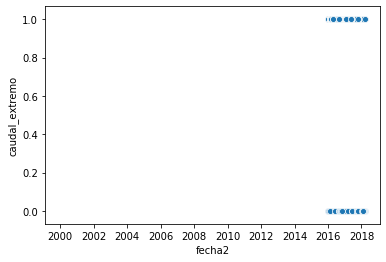

In [170]:
sb.scatterplot(x='fecha2', y='caudal_extremo', data=after_2016_caudal)

In [137]:
after_2016_caudal.groupby('fecha').caudal.agg(P95)

fecha
1960-01-02 00:00:00+00:00    170.00000
1960-01-03 00:00:00+00:00    163.20000
1960-01-04 00:00:00+00:00    103.09000
1960-01-05 00:00:00+00:00     95.43000
1960-01-06 00:00:00+00:00    138.46000
                               ...    
2018-03-05 00:00:00+00:00    448.01340
2018-03-06 00:00:00+00:00    250.86275
2018-03-07 00:00:00+00:00    272.60080
2018-03-08 00:00:00+00:00    411.82600
2018-03-09 00:00:00+00:00    609.00085
Name: caudal, Length: 21252, dtype: float64

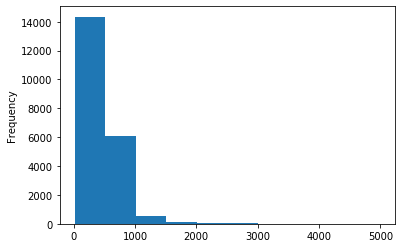

In [132]:
fecha_cau.plot(kind='hist')

In [134]:
datos_caudal.groupby('fecha').caudal.agg(P95)

fecha
1960-01-02 00:00:00+00:00    170.00000
1960-01-03 00:00:00+00:00    163.20000
1960-01-04 00:00:00+00:00    103.09000
1960-01-05 00:00:00+00:00     95.43000
1960-01-06 00:00:00+00:00    138.46000
                               ...    
2018-03-05 00:00:00+00:00    448.01340
2018-03-06 00:00:00+00:00    250.86275
2018-03-07 00:00:00+00:00    272.60080
2018-03-08 00:00:00+00:00    411.82600
2018-03-09 00:00:00+00:00    609.00085
Name: caudal, Length: 21252, dtype: float64

# 7

In [474]:
datos_caudal.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,...,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,fecha2,caudal_extremo,temp_extremo,precip_extremo,year
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-01-06 00:00:00+00:00,False,False,False,1960
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-03-27 00:00:00+00:00,False,False,False,1960
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-05-07 00:00:00+00:00,False,False,False,1960
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-06-30 00:00:00+00:00,False,False,False,1960
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN,1960-07-22 00:00:00+00:00,False,False,False,1960


In [511]:
X = datos_caudal[datos_caudal.columns.values[-4]]
y = datos_caudal[datos_caudal.columns.values[-3]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = None)

In [501]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_std = scaler.transform(X_train)
#X_test_std = scaler.transform(X_test)

In [502]:
#defino funcion graficar
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min = X[:, 0].min() - 1
    x1_max = X[:, 0].max() + 1
    x2_min = X[:, 1].min() - 1
    x2_max = X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8, 
                    c = colors[idx],
                    marker = markers[idx], 
                    label = cl,
                    edgecolor = 'black')

In [514]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
tree.fit(X, y)
plot_decision_regions(X_test, y_test, classifier=tree)
plt.xlabel('cuenca')
plt.ylabel('longitud')
plt.legend(loc = 'upper left');

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.